In [1]:
# Predict Price of  house based on features like SqFt, Bedrooms, Bathrooms etc.

In [2]:
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt, style
style.use('ggplot')

In [3]:
df = pd.read_csv("house.csv")

In [4]:
df.head()

,Bathrooms,Offers,Brick,Neighborhood,Bedrooms,SqFt,Price
0,2,2,No,East,2,1790,114300
1,2,3,No,East,4,2030,114200
2,2,1,No,East,3,1740,114800
3,2,3,No,East,3,1980,94700
4,3,3,No,East,3,2130,119800


# EDA

# Data Preparation

In [6]:
## Feature Encoding
df_dummy = pd.get_dummies(data=df, columns=['Brick','Neighborhood'],drop_first=True,dtype=int)
df_dummy.head()

,Bathrooms,Offers,Bedrooms,SqFt,Price,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2,2,2,1790,114300,0,0,0
1,2,3,4,2030,114200,0,0,0
2,2,1,3,1740,114800,0,0,0
3,2,3,3,1980,94700,0,0,0
4,3,3,3,2130,119800,0,0,0


In [8]:
# separate features and outcome
X = df_dummy.drop(columns='Price')
y = df_dummy['Price']

#split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [11]:
# standardize data
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X_train[['Bathrooms','Offers','Bedrooms','SqFt']])
X_train[['Bathrooms','Offers','Bedrooms','SqFt']]=st.transform(X_train[['Bathrooms','Offers','Bedrooms','SqFt']])

X_test[['Bathrooms','Offers','Bedrooms','SqFt']]=st.transform(X_test[['Bathrooms','Offers','Bedrooms','SqFt']])

In [20]:
st.mean_ # mean for each columns

array([   2.44791667,    2.51041667,    2.96875   , 1981.77083333])

In [22]:
st.var_ # variance for each columns

array([2.68120660e-01, 1.08322483e+00, 5.09440104e-01, 4.69958225e+04])

In [21]:
st.feature_names_in_

array(['Bathrooms', 'Offers', 'Bedrooms', 'SqFt'], dtype=object)

In [18]:
X_train.columns

Index(['Bathrooms', 'Offers', 'Bedrooms', 'SqFt', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [17]:
import os
os.getcwd()

'/voc/work/Weekdays ML/Instructor_Materials/0.1_Instructor_Slides_and_Notebooks/Lesson_04_Regression_and_Its_Applications'

In [ ]:
os.chdir("")

# Model Building

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))

Train Score:  0.8697938712626114
Test Score:  0.8582961043180666


# Save model

In [14]:
import joblib
# save the Standard Scaler model
joblib.dump(st,"StandardScaler_house.h5")
#save the linear regression model
joblib.dump(model,"Lineareg_house.h5")

['Lineareg_house.h5']

In [19]:
model.coef_

array([ 4464.62691012, -8525.33737224,  3631.31814115, 11406.39780838,
       16220.52416008,  1480.2392325 , 20948.60993449])

# Model Evaluation Techniques

In [25]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [26]:
from sklearn import metrics

In [32]:
# mean squared error on train data set
metrics.mean_squared_error(y_train,y_train_pred)

97781979.28846645

In [28]:
# mean squared error on test data set
metrics.mean_squared_error(y_test,y_test_pred)

86538966.25133625

In [35]:
## root mean squared error on train data set
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

9888.47709652333

In [34]:
## root mean squared error on test data set
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

9302.632221652979

In [36]:
# print obeserverd values vs predicted
pd.DataFrame({'Observed':y_train,"Predicted":y_train_pred})


,Observed,Predicted
76,129800,136384.719222
43,154000,139321.761601
15,145800,141771.245376
93,157100,131950.767034
95,152500,157813.522001
...,...,...
67,151900,126742.488415
64,130300,132701.590251
117,117800,116390.187238
47,90300,90465.126157


In [30]:
# MAE for train
metrics.mean_absolute_error(y_train,y_train_pred)

7798.073585992388

In [31]:
# MAE for test
metrics.mean_absolute_error(y_test,y_test_pred)

7080.190154744372

In [38]:
# print obeserverd values vs predicted
pd.DataFrame({'Observed':y_train,"Predicted":y_train_pred})


,Observed,Predicted
76,129800,136384.719222
43,154000,139321.761601
15,145800,141771.245376
93,157100,131950.767034
95,152500,157813.522001
...,...,...
67,151900,126742.488415
64,130300,132701.590251
117,117800,116390.187238
47,90300,90465.126157


# Polynomial Features

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))

Train Score:  0.8915436027829815
Test Score:  0.6548145611239538


In [58]:
# Model is overfitted, lets try regularizing it with Ridge/Lasso
from sklearn.linear_model import Lasso
lassoModel = Lasso(alpha=900,max_iter=200000)
lassoModel.fit(X_train,y_train)
print("Train Score: ",lassoModel.score(X_train,y_train))
print("Test Score: ",lassoModel.score(X_test,y_test))

Train Score:  0.8689037234923355
Test Score:  0.8621948254306241


# Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'alpha':[0.5,2,10,20,100,0.9,1.2,1000,458]}

model = Lasso(max_iter=200000)
gridModel = GridSearchCV(model,param_grid=parameter_grid,cv=2)

gridModel.fit(X_train,y_train)

gridModel.best_estimator_

Lasso(alpha=1000, max_iter=200000)

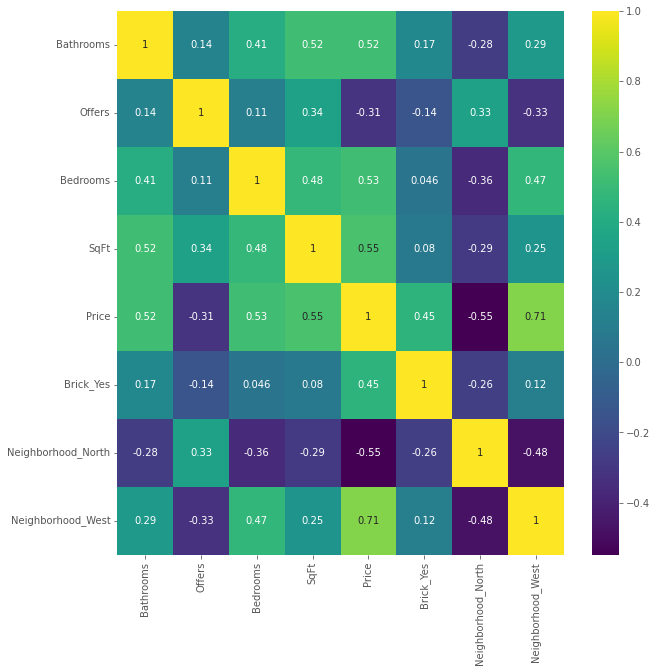

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df_dummy.corr(),cmap='viridis',annot=True)
plt.show()

In [ ]:
# Variance Inflation Factor